# Predictions

## Data wrangling

In [16]:
# Preamble
import pandas as pd
import numpy as np
pd.set_option("mode.chained_assignment", None)
import random
random.seed(1509)
import matplotlib.pyplot as plt
import lightgbm as lgb
import pyarrow.feather as feather
from os import chdir, getcwd
import statsmodels.api as sm

# sci-kit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [2]:
data_dir = '/home/jovyan/work/Data/'
results_dir = '/home/jovyan/work/Results/'

In [3]:
select_features = ['reporter.ISO', 'partner.ISO', 'year',
                   'ln.Tot_IFF_t', 'ln.In_Tot_IFF_t',
                   'ln.gdp_o', 'ln.gdp_d', 'ln.pop_o', 'ln.pop_d', 
                   'dist', 'contig', 
                   'comlang', 'comcol', 'col45', 
                   'ihs.entry_cost_o', 'ihs.entry_cost_d', 'rta',
                   'rCorrCont', 'pCorrCont',
                   'rRegQual', 'pRegQual', 
                   'rRuleLaw', 'pRuleLaw',
                   'rSecrecyScore', 'pSecrecyScore',
                   'rFSI.rank', 'pFSI.rank',
                   'rKFSI13', 'pKFSI13',
                   'rKFSI17', 'pKFSI17',
                   'rKFSI20', 'pKFSI20',
                   'rFATF', 'pFATF',
                   'ihs.tariff',
                   'kai_o', 'kai_d', 'kao_o', 'kao_d',
                   'cc_o', 'cc_d', 'cci_o', 'cci_d', 'cco_o', 'cco_d',
                   'di_o', 'di_d', 'dii_o', 'dii_d', 'dio_o', 'dio_d']
features = [       'ln.gdp_o', 'ln.gdp_d', 'ln.pop_o', 'ln.pop_d', 
                   'dist', 'contig', 
                   'comlang', 'comcol', 'col45', 
                   'ihs.entry_cost_o', 'ihs.entry_cost_d', 'rta',
                   'rCorrCont', 'pCorrCont',
                   'rRegQual', 'pRegQual', 
                   'rRuleLaw', 'pRuleLaw',
                   'rSecrecyScore', 'pSecrecyScore',
                   'rFSI.rank', 'pFSI.rank',
                   'rKFSI13', 'pKFSI13',
                   'rKFSI17', 'pKFSI17',
                   'rKFSI20', 'pKFSI20',
                   'rFATF', 'pFATF',
                   'ihs.tariff',
                   'kai_o', 'kai_d', 'kao_o', 'kao_d',
                   'cc_o', 'cc_d', 'cci_o', 'cci_d', 'cco_o', 'cco_d',
                   'di_o', 'di_d', 'dii_o', 'dii_d', 'dio_o', 'dio_d']

## Subset from training and test samples

In [4]:
train_agg = feather.read_feather(results_dir + 'train_agg.feather')
test_agg = feather.read_feather(results_dir + 'test_agg.feather')

In [5]:
def create_smp(data, features):
    """
    Create train and test samples that are complete.
    """
    smp = data[features]
    smp.dropna(axis=0, how='any', inplace=True)
    return smp

In [6]:
train_agg_smp = create_smp(train_agg, select_features)
test_agg_smp = create_smp(test_agg, select_features)

In [7]:
feather.write_feather(train_agg_smp, results_dir + 'train_agg_smp.feather')
feather.write_feather(test_agg_smp, results_dir + 'test_agg_smp.feather')

In [8]:
Y_train_out = train_agg_smp[['ln.Tot_IFF_t']]
Y_train_in = train_agg_smp[['ln.In_Tot_IFF_t']]
X_train = train_agg_smp[features]
Y_test_out = test_agg_smp[['ln.Tot_IFF_t']]
Y_test_in = test_agg_smp[['ln.In_Tot_IFF_t']]
X_test = test_agg_smp[features]

In [9]:
print('X_train: ', X_train.shape, '\nX_test: ',  X_test.shape)

X_train:  (26512, 47) 
X_test:  (6341, 47)


## Linear regression

In [ ]:
linear_mod_out = LinearRegression()  
linear_mod_out.fit(X_train.values, Y_train_out.values)

In [ ]:
linear_mod_in = LinearRegression()  
linear_mod_in.fit(X_train.values, Y_train_in.values)

In [ ]:
print(linear_mod_out.intercept_)
print(linear_mod_out.coef_)

In [ ]:
print(linear_mod_in.intercept_)
print(linear_mod_in.coef_)

In [ ]:
Xconst = sm.add_constant(X_train)
est = sm.OLS(Y_train_out, Xconst)
est2 = est.fit()
print(est2.summary())

In [ ]:
Xconst = sm.add_constant(X_train)
est = sm.OLS(Y_train_in, Xconst)
est2 = est.fit()
print(est2.summary())

In [ ]:
preds_LM_train_out = linear_mod_out.predict(X_train)
preds_LM_test_out = linear_mod_out.predict(X_test)

In [ ]:
preds_LM_train_in = linear_mod_in.predict(X_train)
preds_LM_test_in = linear_mod_in.predict(X_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_LM_train_out), results_dir + 'preds.LM.train_out_agg.feather')
feather.write_feather(pd.DataFrame(preds_LM_test_out), results_dir + 'preds.LM.test_out_agg.feather')

In [ ]:
feather.write_feather(pd.DataFrame(preds_LM_train_in), results_dir + 'preds.LM.train_in_agg.feather')
feather.write_feather(pd.DataFrame(preds_LM_test_in), results_dir + 'preds.LM.test_in_agg.feather')

In [ ]:
print("RMSE of the training set (outflows):", np.sqrt(mean_squared_error(Y_train_out, preds_LM_train_out)))
print("R^2 of the training set (outflows):", r2_score(Y_train_out, preds_LM_train_out))
print("RMSE of the test set (outflows):", np.sqrt(mean_squared_error(Y_test_out, preds_LM_test_out)))
print("R^2 of the test set (outflows):", r2_score(Y_test_out, preds_LM_test_out))

In [ ]:
print("RMSE of the training set (inflows):", np.sqrt(mean_squared_error(Y_train_in, preds_LM_train_in)))
print("R^2 of the training set (inflows):", r2_score(Y_train_in, preds_LM_train_in))
print("RMSE of the test set (inflows):", np.sqrt(mean_squared_error(Y_test_in, preds_LM_test_in)))
print("R^2 of the test set (inflows):", r2_score(Y_test_in, preds_LM_test_in))

In [ ]:
print('Mean Absolute Error (outflows):', metrics.mean_absolute_error(Y_test_out, preds_LM_test_out))  
print('Mean Squared Error of the training set (outflows):', mean_squared_error(Y_train_out, preds_LM_train_out))
print('Mean Squared Error of the test set (outflows):', mean_squared_error(Y_test_out, preds_LM_test_out))
print('Dollar RMSE of the training set (outflows):', np.mean(np.square((np.exp(Y_train_out.values)*10**3 - np.exp(preds_LM_train_out)*10**3))) / 10**9)
print('Dollar RMSE of the test set (outflows):', np.mean(np.square((np.exp(Y_test_out.values)*10**3 - np.exp(preds_LM_test_out)*10**3))) / 10**6)

In [ ]:
print('Mean Absolute Error (inflows):', metrics.mean_absolute_error(Y_test_in, preds_LM_test_in))
print('Mean Squared Error of the training set (inflows):', mean_squared_error(Y_train_in, preds_LM_train_in))
print('Mean Squared Error of the test set (inflows):', mean_squared_error(Y_test_in, preds_LM_test_in))
print('Dollar RMSE of the test set (inflows):', np.mean(np.square((np.exp(Y_train_in.values)*10**3 - np.exp(preds_LM_train_in)*10**3))) / 10**9)
print('Dollar RMSE of the test set (inflows):', np.mean(np.square((np.exp(Y_test_in.values)*10**3 - np.exp(preds_LM_test_in)*10**3))) / 10**9)

## Random Forests

In [12]:
RF_mod_out = RandomForestRegressor(max_depth = 10, random_state = 1509)
RF_mod_out.fit(X_train, Y_train_out.values.ravel())

RandomForestRegressor(max_depth=10, random_state=1509)

In [13]:
RF_mod_in = RandomForestRegressor(max_depth = 10, random_state = 1509)
RF_mod_in.fit(X_train, Y_train_in.values.ravel())

RandomForestRegressor(max_depth=10, random_state=1509)

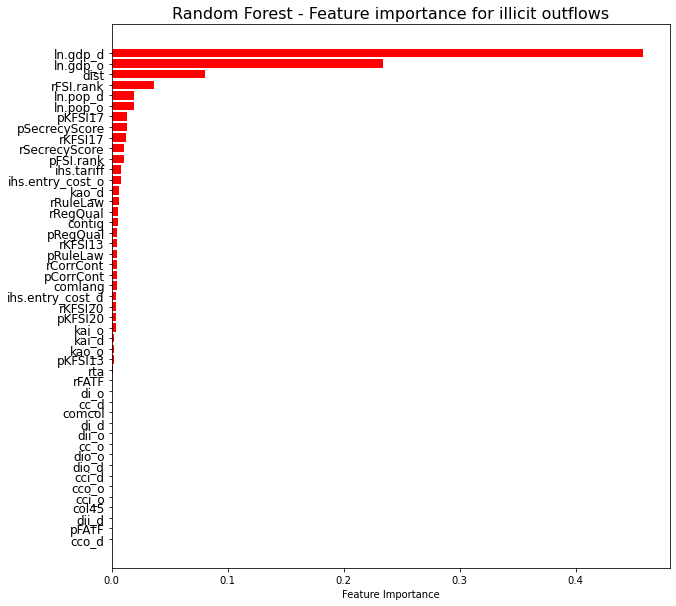

In [91]:
feat_importances = pd.Series(RF_mod_out.feature_importances_, index=X_train.columns)
#feat_importances.nlargest(20).plot(kind='barh')
indices = np.argsort(-1*feat_importances)
names = [X_train.columns[i] for i in indices]
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(range(X_train.shape[1]), feat_importances[indices], color = 'red')
plt.yticks(range(X_train.shape[1]), names, fontsize = 12)
plt.gca().invert_yaxis()
ax.set_xlabel('Feature importance')
plt.title("Random Forest - Feature importance for illicit outflows", fontsize = 16)
plt.savefig(results_dir + 'RF_feature_importance_out.png')

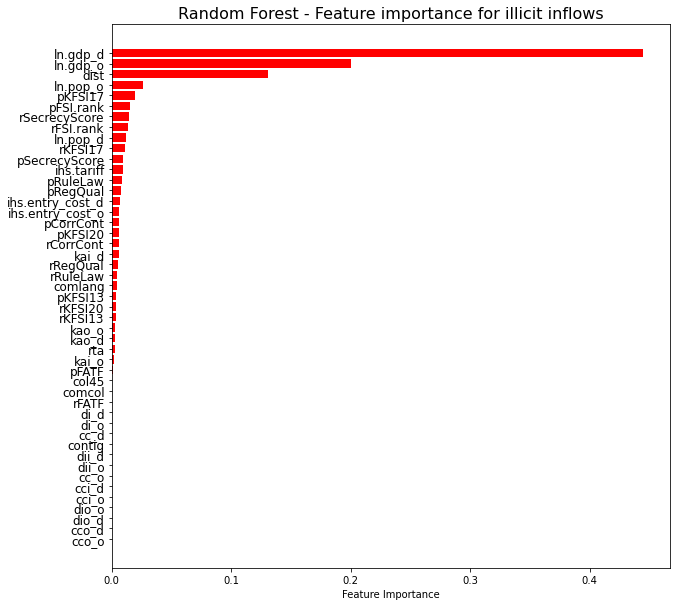

In [90]:
feat_importances = pd.Series(RF_mod_in.feature_importances_, index=X_train.columns)
#feat_importances.nlargest(46).plot(kind='barh')
indices = np.argsort(-1*feat_importances)
names = [X_train.columns[i] for i in indices]
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(range(X_train.shape[1]), feat_importances[indices], color = 'red')
plt.yticks(range(X_train.shape[1]), names, fontsize = 12)
plt.gca().invert_yaxis()
ax.set_xlabel('Feature importance')
plt.title("Random Forest - Feature importance for illicit inflows", fontsize = 16)
plt.savefig(results_dir + 'RF_feature_importance_in.png')

In [ ]:
tree.export_graphviz(RF_mod_out.estimators_[0])

In [ ]:
tree.plot_tree(RF_mod_out.estimators_[0])

In [ ]:
preds_RF_train_out = RF_mod_out.predict(X_train)
preds_RF_test_out = RF_mod_out.predict(X_test)

In [ ]:
preds_RF_train_in = RF_mod_in.predict(X_train)
preds_RF_test_in = RF_mod_in.predict(X_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_RF_train_out), results_dir + 'preds.RF.train_out_agg.feather')
feather.write_feather(pd.DataFrame(preds_RF_test_out), results_dir + 'preds.RF.test_out_agg.feather')

In [ ]:
feather.write_feather(pd.DataFrame(preds_RF_train_in), results_dir + 'preds.RF.train_in_agg.feather')
feather.write_feather(pd.DataFrame(preds_RF_test_in), results_dir + 'preds.RF.test_in_agg.feather')

In [ ]:
print("RMSE of the training set (outflows):", np.sqrt(mean_squared_error(Y_train_out, preds_RF_train_out)))
print("R^2 of the training set (outflows):", r2_score(Y_train_out, preds_RF_train_out))
print("RMSE of the test set (outflows):", np.sqrt(mean_squared_error(Y_test_out, preds_RF_test_out)))
print("R^2 of the test set (outflows):", r2_score(Y_test_out, preds_RF_test_out))

In [ ]:
print("RMSE of the training set (inflows):", np.sqrt(mean_squared_error(Y_train_in, preds_RF_train_in)))
print("R^2 of the training set (inflows):", r2_score(Y_train_in, preds_RF_train_in))
print("RMSE of the test set (inflows):", np.sqrt(mean_squared_error(Y_test_in, preds_RF_test_in)))
print("R^2 of the test set (inflows):", r2_score(Y_test_in, preds_RF_test_in))

In [ ]:
print('Mean Absolute Error (outflows):', metrics.mean_absolute_error(Y_test_out, preds_RF_test_out))
print('Mean Squared Error of the training set (outflows):', mean_squared_error(Y_train_out, preds_RF_train_out))
print('Mean Squared Error of the test set (outflows):', mean_squared_error(Y_test_out, preds_RF_test_out))
print('Dollar RMSE of the training set (outflows):', np.mean(np.square((np.exp(Y_train_out.values) - np.exp(preds_RF_train_out)))))
print('Dollar RMSE of the test set (outflows):', np.mean(np.square((np.exp(Y_test_out.values) - np.exp(preds_RF_test_out)))))

In [ ]:
print('Mean Absolute Error (inflows):', metrics.mean_absolute_error(Y_test_in, preds_RF_test_in))  
print('Mean Squared Error of the training set (inflows):', mean_squared_error(Y_train_in, preds_RF_train_in))
print('Mean Squared Error of the test set (inflows):', mean_squared_error(Y_test_in, preds_RF_test_in))
#print('Dollar RMSE of the training set (inflows):', np.mean(np.square(np.exp(Y_train_in.values)/10**3 - np.exp(preds_RF_train_in)/10**3)))
#print('Dollar RMSE of the test set (inflows):', np.mean(np.square(np.exp(Y_test_in.values)/10**3 - np.exp(preds_RF_test_in)/10**3)))

## Light GBM

In [85]:
lightGBM_train_out = lgb.Dataset(X_train, Y_train_out)
lightGBM_test_out = lgb.Dataset(X_test, Y_test_out)
lightGBM_train_in = lgb.Dataset(X_train, Y_train_in)
lightGBM_test_in = lgb.Dataset(X_test, Y_test_in)

In [86]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1,
    'random_state' : 1509
}
lightGBM_mod_out = lgb.train(
    params,
    lightGBM_train_out,
    500,
    valid_sets = [lightGBM_train_out, lightGBM_test_out],
    valid_names = ["train", "test"],
    early_stopping_rounds = 50,
    verbose_eval = 500
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[439]	train's rmse: 0.619447	test's rmse: 1.2811


In [87]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1,
    'random_state' : 1509
}
lightGBM_mod_in = lgb.train(
    params,
    lightGBM_train_in,
    500,
    valid_sets = [lightGBM_train_in, lightGBM_test_in],
    valid_names = ["train", "test"],
    early_stopping_rounds = 50,
    verbose_eval = 500
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[295]	train's rmse: 0.758735	test's rmse: 1.4808


In [ ]:
preds_lightGBM_train_out = pd.DataFrame(lightGBM_mod_out.predict(X_train))
preds_lightGBM_test_out = pd.DataFrame(lightGBM_mod_out.predict(X_test))

In [ ]:
preds_lightGBM_train_in = pd.DataFrame(lightGBM_mod_in.predict(X_train))
preds_lightGBM_test_in = pd.DataFrame(lightGBM_mod_in.predict(X_test))

In [ ]:
feather.write_feather(preds_lightGBM_train_out, results_dir + 'preds.lightGBM.train_out_agg.feather')
feather.write_feather(preds_lightGBM_test_out, results_dir + 'preds.lightGBM.test_out_agg.feather')

In [ ]:
feather.write_feather(preds_lightGBM_train_in, results_dir + 'preds.lightGBM.train_in_agg.feather')
feather.write_feather(preds_lightGBM_test_in, results_dir + 'preds.lightGBM.test_in_agg.feather')

In [ ]:
print("RMSE of the training set (outflows):", np.sqrt(mean_squared_error(Y_train_out, preds_lightGBM_train_out)))
print("R^2 of the training set (outflows):", r2_score(Y_train_out, preds_lightGBM_train_out))
print("RMSE of the test set (outflows):", np.sqrt(mean_squared_error(Y_test_out, preds_lightGBM_test_out)))
print("R^2 of the test set (outflows):", r2_score(Y_test_out, preds_lightGBM_test_out))

In [ ]:
print("RMSE of the training set (inflows):", np.sqrt(mean_squared_error(Y_train_in, preds_lightGBM_train_in)))
print("R^2 of the training set (inflows):", r2_score(Y_train_in, preds_lightGBM_train_in))
print("RMSE of the test set (inflows):", np.sqrt(mean_squared_error(Y_test_in, preds_lightGBM_test_in)))
print("R^2 of the test set (inflows):", r2_score(Y_test_in, preds_lightGBM_test_in))

In [ ]:
print('Mean Absolute Error (outflows):', metrics.mean_absolute_error(Y_test_out, preds_lightGBM_test_out))
print('Mean Squared Error of the training set (outflows):', mean_squared_error(Y_train_out, preds_lightGBM_train_out))
print('Mean Squared Error of the test set (outflows):', mean_squared_error(Y_test_out, preds_lightGBM_test_out))
#print('Dollar RMSE of the training set (outflows):', np.mean(np.square(np.exp(Y_train_out.values)*10**3 - np.exp(preds_lightGBM_train_out)*10**3)) / 10**6)
#print('Dollar RMSE of the test set (outflows):', np.mean(np.square(np.exp(Y_test_out.values)*10**3 - np.exp(preds_lightGBM_test_out)*10**3)) / 10**6)

In [ ]:
print('Mean Absolute Error (inflows):', metrics.mean_absolute_error(Y_test_in, preds_lightGBM_test_in))
print('Mean Squared Error of the training set (inflows):', mean_squared_error(Y_train_in, preds_lightGBM_train_in))
print('Mean Squared Error of the test set (inflows):', mean_squared_error(Y_test_in, preds_lightGBM_test_in))
#print('Dollar RMSE of the training set (inflows):', np.mean(np.square(np.exp(Y_train_in.values)/10**3 - np.exp(preds_lightGBM_train_in)/10**3)))
#print('Dollar RMSE of the test set (inflows):', np.mean(np.square(np.exp(Y_test_in.values)/10**3 - np.exp(preds_lightGBM_test_in)/10**3)))

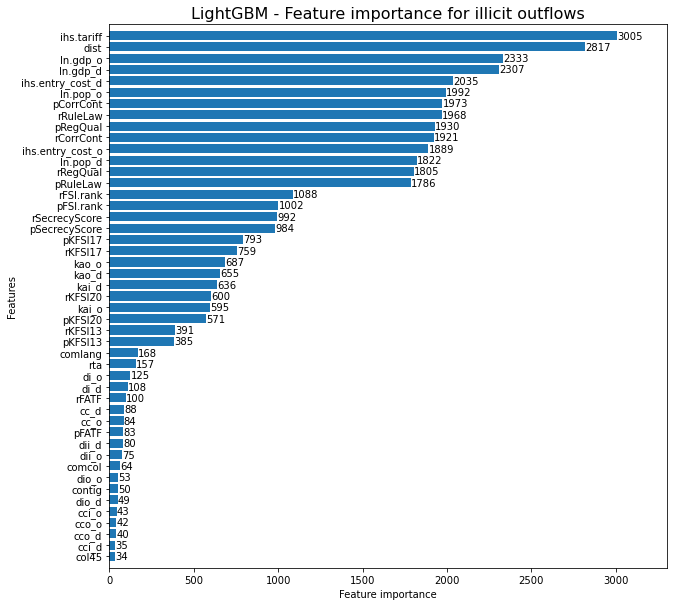

In [88]:
fig, ax = plt.subplots(figsize = (10, 10))
lgb.plot_importance(lightGBM_mod_out, height = 0.8, ax = ax)
ax.grid(False)
plt.title("LightGBM - Feature importance for illicit outflows", fontsize = 16)
plt.savefig(results_dir + 'LightGBM_feature_importance_out.png')

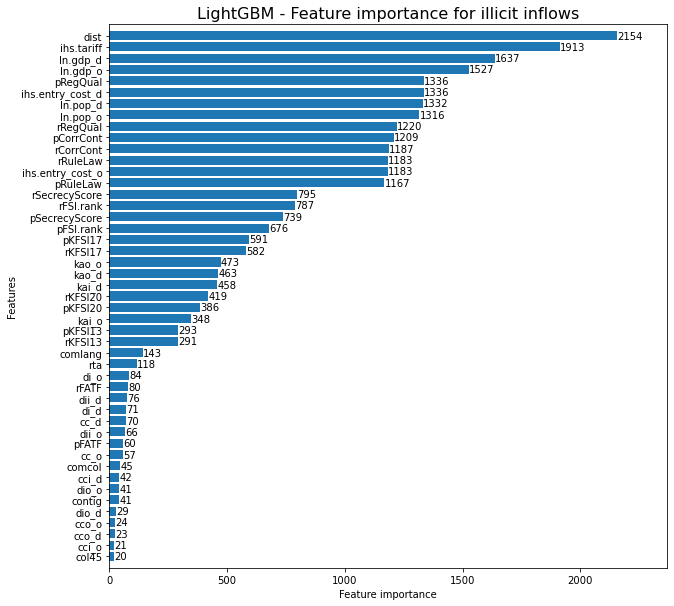

In [89]:
fig, ax = plt.subplots(figsize = (10,10))
lgb.plot_importance(lightGBM_mod_in, height = 0.8, ax = ax)
ax.grid(False)
plt.title("LightGBM - Feature importance for illicit inflows", fontsize = 16)
plt.savefig(results_dir + 'LightGBM_feature_importance_in.png')

## Support Vector Machine

In [ ]:
SVM_mod = svm.SVR()
SVM_mod.fit(X_train, Y_train.values.ravel())

In [ ]:
preds_SVM_train = SVM_mod.predict(X_train)
preds_SVM_test = SVM_mod.predict(X_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_SVM_train), results_dir + 'preds.SVM.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_SVM_test), results_dir + 'preds.SVM.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_SVM_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_SVM_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_SVM_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_SVM_test))

## Neural Networks

In [ ]:
Y_train = train_agg_smp[['Tot_IFF_t']]
X_train = train_agg_smp[features]
Y_test = test_agg_smp[['Tot_IFF_t']]
X_test = test_agg_smp[features]

In [ ]:
std_sc = StandardScaler()
NN_train = std_sc.fit_transform(X_train)
NN_test = std_sc.transform(X_test)

In [ ]:
NN_mod = MLPRegressor(hidden_layer_sizes = (10),
                      activation = "logistic",
                      random_state = 1, 
                      max_iter = 1000).fit(NN_train, Y_train.values.ravel())

In [ ]:
preds_NN_train = NN_mod.predict(NN_train)
preds_NN_test = NN_mod.predict(NN_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_NN_train), results_dir + 'preds.NN.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_NN_test), results_dir + 'preds.NN.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_NN_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_NN_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_NN_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_NN_test))

### Tuning hyperparameters

In [ ]:
NN = MLPRegressor(max_iter = 1000)
parameter_space = {
    'hidden_layer_sizes': [(10,20)],
    'activation': ['logistic', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}

In [ ]:
NN_mod_tuned = GridSearchCV(NN, parameter_space, n_jobs = -1, cv = 3)

In [ ]:
NN_mod_tuned.fit(NN_train, Y_train.values.ravel())

In [ ]:
print('Best parameters found:\n', NN_mod_tuned.best_params_)

In [ ]:
# All results
means = NN_mod_tuned.cv_results_['mean_test_score']
stds = NN_mod_tuned.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, NN_mod_tuned.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
preds_NN_train = NN_mod_tuned.predict(NN_train)
preds_NN_test = NN_mod_tuned.predict(NN_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_NN_train), results_dir + 'preds.NN.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_NN_test), results_dir + 'preds.NN.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_NN_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_NN_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_NN_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_NN_test))